In [16]:
#data cleaning/data munging
import pandas as pd
#df = pd.read_csv("weather_data_missing.csv")
df = pd.read_csv("weather_data_missing.csv",parse_dates=['day'])
#df = pd.read_csv("weather_data_missing.csv",index_col='day',parse_dates=['day'])
#df = pd.read_csv("weather_data_missing.csv",skiprows =3,parse_dates=['day'])
#type(df.day[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   day          9 non-null      datetime64[ns]
 1   temperature  5 non-null      float64       
 2   windspeed    6 non-null      object        
 3   event        7 non-null      object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 420.0+ bytes


In [8]:
df2=df.isna()
df2

,day,temperature,windspeed,event
0,False,False,False,False
1,False,True,False,False
2,False,False,False,False
3,False,True,False,True
4,False,False,True,False
5,False,True,True,False
6,False,True,True,True
7,False,False,False,False
8,False,False,False,False


In [9]:
df.isna().sum()

day            0
temperature    4
windspeed      3
event          2
dtype: int64

In [10]:
df.isnull()

,day,temperature,windspeed,event
0,False,False,False,False
1,False,True,False,False
2,False,False,False,False
3,False,True,False,True
4,False,False,True,False
5,False,True,True,False
6,False,True,True,True
7,False,False,False,False
8,False,False,False,False


In [11]:
df.isnull().sum()

day            0
temperature    4
windspeed      3
event          2
dtype: int64

<Axes: >

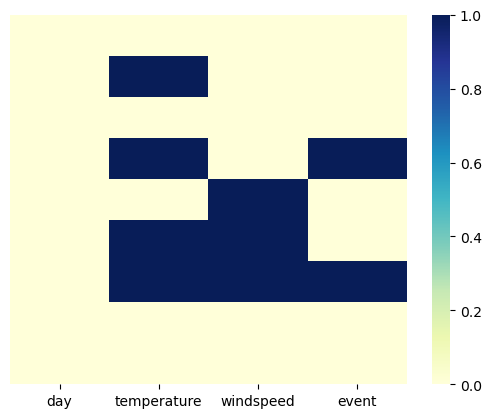

In [13]:
import seaborn as sns
sns.color_palette("rocket", as_cmap=True)
sns.heatmap(df.isnull(),yticklabels=False,cmap="YlGnBu")

In [14]:
df.dropna(inplace=True)

<Axes: >

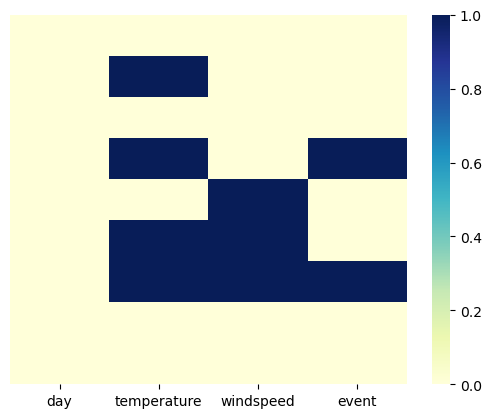

In [19]:
import seaborn as sns
sns.color_palette("rocket", as_cmap=True)
sns.heatmap(df.isnull(),yticklabels=False,cmap="YlGnBu")

In [20]:
df1=df.dropna(thresh=2) # minimum 2 nan value allowed

<Axes: >

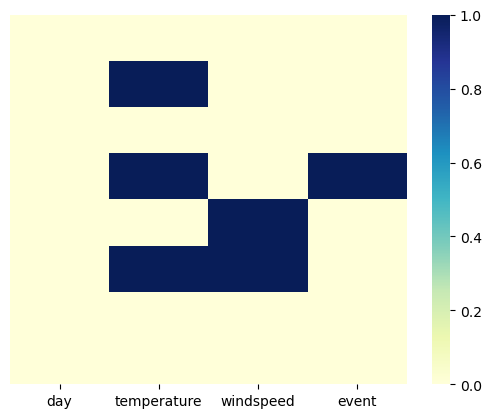

In [22]:
import seaborn as sns
sns.color_palette("rocket", as_cmap=True)
sns.heatmap(df1.isnull(),yticklabels=False,cmap="YlGnBu")

In [25]:
df = pd.read_csv("weather_data_missing.csv",parse_dates=['day'])

In [26]:
df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6,Rain
1,2017-01-04,NaN,9,Sunny
2,2017-01-05,28.0,,Snow
3,2017-01-06,NaN,7,NaN
4,2017-01-07,32.0,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-09,NaN,NaN,NaN
7,2017-01-10,34.0,8,Cloudy
8,2017-01-11,40.0,12,Sunny


In [27]:
df1=df.fillna(0)
df1

,day,temperature,windspeed,event
0,2017-01-01,32.0,6,Rain
1,2017-01-04,0.0,9,Sunny
2,2017-01-05,28.0,,Snow
3,2017-01-06,0.0,7,0
4,2017-01-07,32.0,0,Rain
5,2017-01-08,0.0,0,Sunny
6,2017-01-09,0.0,0,0
7,2017-01-10,34.0,8,Cloudy
8,2017-01-11,40.0,12,Sunny


In [29]:
new_df=df.fillna({'temperature':0,'event':'No Event','windspeed':"No Wind"})
new_df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6,Rain
1,2017-01-04,0.0,9,Sunny
2,2017-01-05,28.0,,Snow
3,2017-01-06,0.0,7,No Event
4,2017-01-07,32.0,No Wind,Rain
5,2017-01-08,0.0,No Wind,Sunny
6,2017-01-09,0.0,No Wind,No Event
7,2017-01-10,34.0,8,Cloudy
8,2017-01-11,40.0,12,Sunny


In [30]:
new_df=df.copy()
new_df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6,Rain
1,2017-01-04,NaN,9,Sunny
2,2017-01-05,28.0,,Snow
3,2017-01-06,NaN,7,NaN
4,2017-01-07,32.0,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-09,NaN,NaN,NaN
7,2017-01-10,34.0,8,Cloudy
8,2017-01-11,40.0,12,Sunny


In [32]:
avg=new_df['temperature'].mean()
avg

33.2

In [33]:
new_df['temperature']=new_df['temperature'].fillna(avg)
new_df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6,Rain
1,2017-01-04,33.2,9,Sunny
2,2017-01-05,28.0,,Snow
3,2017-01-06,33.2,7,NaN
4,2017-01-07,32.0,NaN,Rain
5,2017-01-08,33.2,NaN,Sunny
6,2017-01-09,33.2,NaN,NaN
7,2017-01-10,34.0,8,Cloudy
8,2017-01-11,40.0,12,Sunny


In [35]:
new_df=new_df.fillna(method='ffill')
new_df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6,Rain
1,2017-01-04,33.2,9,Sunny
2,2017-01-05,28.0,,Snow
3,2017-01-06,33.2,7,Snow
4,2017-01-07,32.0,7,Rain
5,2017-01-08,33.2,7,Sunny
6,2017-01-09,33.2,7,Sunny
7,2017-01-10,34.0,8,Cloudy
8,2017-01-11,40.0,12,Sunny


In [39]:
new_df=df.copy()
new_df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6,Rain
1,2017-01-04,NaN,9,Sunny
2,2017-01-05,28.0,,Snow
3,2017-01-06,NaN,7,NaN
4,2017-01-07,32.0,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-09,NaN,NaN,NaN
7,2017-01-10,34.0,8,Cloudy
8,2017-01-11,40.0,12,Sunny


In [40]:
new_df.fillna(method='bfill')

,day,temperature,windspeed,event
0,2017-01-01,32.0,6,Rain
1,2017-01-04,28.0,9,Sunny
2,2017-01-05,28.0,,Snow
3,2017-01-06,32.0,7,Rain
4,2017-01-07,32.0,8,Rain
5,2017-01-08,34.0,8,Sunny
6,2017-01-09,34.0,8,Cloudy
7,2017-01-10,34.0,8,Cloudy
8,2017-01-11,40.0,12,Sunny


In [42]:
df = pd.read_csv("weather_data_missing.csv",parse_dates=['day'])
df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,NaN,9.0,Sunny
2,2017-01-05,28.0,NaN,Snow
3,2017-01-06,NaN,7.0,NaN
4,2017-01-07,32.0,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-09,NaN,NaN,NaN
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


In [46]:
df.fillna(method="ffill",limit=1)

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,32.0,9.0,Sunny
2,2017-01-05,28.0,9.0,Snow
3,2017-01-06,28.0,7.0,Snow
4,2017-01-07,32.0,7.0,Rain
5,2017-01-08,32.0,NaN,Sunny
6,2017-01-09,NaN,NaN,Sunny
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


In [49]:
df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,NaN,9.0,Sunny
2,2017-01-05,28.0,NaN,Snow
3,2017-01-06,NaN,7.0,NaN
4,2017-01-07,32.0,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-09,NaN,NaN,NaN
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


In [48]:
# interpolate() method used with only numeric columns otherwise gives error
df1=df[['temperature','windspeed']].interpolate() 
df1

,temperature,windspeed
0,32.000000,6.00
1,30.000000,9.00
2,28.000000,8.00
3,30.000000,7.00
4,32.000000,7.25
5,32.666667,7.50
6,33.333333,7.75
7,34.000000,8.00
8,40.000000,12.00


In [50]:
df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,NaN,9.0,Sunny
2,2017-01-05,28.0,NaN,Snow
3,2017-01-06,NaN,7.0,NaN
4,2017-01-07,32.0,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-09,NaN,NaN,NaN
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


In [51]:
# we can apply any function on column of dataframe by using apply()
def myconvert(num):
    if num<30:
        return num+10
    elif num>=30 and num<35:
        return num+20
    else:
        return num+30
    
df['temperature f']=df['temperature'].apply(myconvert) 
df    

,day,temperature,windspeed,event,temperature f
0,2017-01-01,32.0,6.0,Rain,52.0
1,2017-01-04,NaN,9.0,Sunny,NaN
2,2017-01-05,28.0,NaN,Snow,38.0
3,2017-01-06,NaN,7.0,NaN,NaN
4,2017-01-07,32.0,NaN,Rain,52.0
5,2017-01-08,NaN,NaN,Sunny,NaN
6,2017-01-09,NaN,NaN,NaN,NaN
7,2017-01-10,34.0,8.0,Cloudy,54.0
8,2017-01-11,40.0,12.0,Sunny,70.0
